In [1]:
from __future__ import division, absolute_import, print_function
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *  # for plotting
from numpy.random import *  # for random sampling
from graph_tool.all import *
import random as rd
import itertools

In [60]:
#---------------------------------------------Parametros iniciais--------------------------------------------------



## Número de sítios da rede

Logo de começo devemos restringir o valor de $m$ com relação a $m_0$, fazendo

<center> $ m \le m_0 $, (1) </center>

essa restrição evita ligações em loop do novo sítio. Nós temos que o número de sítos final da rede será dada por

<center> $N = m_0 + t$, (2) </center>

para cada instante de tempo $t$, haverá $m_0+t$ sítios. Com número de ligações dadas por

<center> $l = m_0+mt$, (3)</center>

pois cada um dos $t$ sítios terão $m$ ligações. Para sabermos quanto devemos utilizar no tempo para um número $N$ de sítios (quantas interações devemos fazer), podemos isolar o $t$ em (2),obtendo

<font size="3"><center> $N-m_0 = t$.  </center></font>

A probabilidade de ligação de um novo sítio $i$ é dada por

<font size="3"><center> $p_i = \frac{k_i}{\sum_i k_i}$ </center></font>,

com a distribuição dos graus dados por

<font size="3"><center> p(k) = $\frac{2m_0(m_0+1)}{k(k+1)(k+2)}$ </center></font>



## 2. Algoritmo para rede inicial

Tomando a rede inicial com $m_0$ sítios totalmente conectada (sítios igualmente provaveis inicialmente), teremos a matriz de adjacência dada por

\begin{equation}
A = 
\begin{pmatrix}
0 & 1 & 1 & \cdots & 1\\
1 & 0 & 1 & \cdots & 1\\
1 & 1 & 0 & \cdots & 1\\
1 & 1 & 1 & \ddots & 1\\
1 & 1 & 1 & \cdots & 0\\
\end{pmatrix}
_{(m_0,m_0)},
\end{equation}

A rede totalmente conectada, possuí todos elementos fora da coluna principal igual a 1. Para isso, podemos expressar um algoritmo primeiro fixando não-ligação para $i=j$ (sem loops), e logo em seguinda tomando a condição de que $j\le i$, para pegar apenas os elementos do triângulo superior da matriz.

In [30]:
g = Graph(directed=False)

#S = g.new_vertex_property("double")
#L = g.new_edge_property("double")
#m0: número de sítios iniciais da rede
m0 = 4
#m: número de ligações que os novos nós devem fazer
m = 2 
#t: por quanto tempo o processo será implementando (gerando novos sítios)
N = 10
g.add_vertex(m0) #Add m0 elements de sítios em g.

K = []
K_aux = []
K_filter = []


for i in range(m0):
    for j in range(i+1,m0):
        g.add_edge(g.vertex(i),g.vertex(j))
        
for i in range(m0):
    K_aux = list(itertools.repeat(int(g.vertex(i)), int(g.vertex(i).out_degree())))
    K += K_aux
    K_filter += K_aux

In [31]:
for i in range(m0,N):
    v = g.add_vertex()
    for j in range(0,m):
        Num = rd.randint(0,len(K_filter)-1) #Gerado um número aleatório dentro de toda dimensão de K_filter
        print(Num)
        u = g.vertex(K_filter[Num]) #Do número aleatório selecionado, pego o sítio que ele representa
        g.add_edge(v,u) #Ligo esse sítio selecionado com o sítio adicionado a rede
        K += [int(u)]
        K_filter = list(filter(lambda val: val !=  int(u), K_filter)) #Filtrando os valores que saíram em Num de K
    
    K_aux = list(itertools.repeat(int(v), int(v.out_degree())))
    K += K_aux
    K_filter = K

print(K)
print(K_filter)

4
1
14
11
9
12
8
12
27
16
0
5
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 0, 4, 4, 4, 3, 5, 5, 3, 4, 6, 6, 2, 4, 7, 7, 7, 4, 8, 8, 0, 2, 9, 9]
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 0, 4, 4, 4, 3, 5, 5, 3, 4, 6, 6, 2, 4, 7, 7, 7, 4, 8, 8, 0, 2, 9, 9]


In [37]:
print(len(K))
a = rd.randint(0,len(K)-1)
print(a)
U = g.vertex(K[a])

print(U)
print(K)
print("ua %i" %int(U))
print("ka %i"%K[a])
print("random number: %i" %a)
print(g.get_vertices())

20
0
0
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 2, 4, 4, 3, 1, 5, 5]
ua 0
ka 0
random number: 0
[0 1 2 3 4 5 6]


In [2]:
#m0: número de sítios' iniciais;
def barabasi_network(m0,m,N,s):
    seed(s)
    g = Graph(directed=False) #Grafo sem direção
    
    g.add_vertex(m0) #Add m0 elements de sítios em g.

    K = [] #Lista que guardará o sítio i, k-vezes;
    K_aux = [] #Lista auxiliar para construção de k;
    K_filter = [] #Lista de K que será filtrada no algoritmo;

    #Construção da rede inicial:
    for i in range(m0):
        for j in range(i+1,m0):
            g.add_edge(g.vertex(i),g.vertex(j)) 
    #-------------------------------------------
    #Construção do K, seguindo a ideia do algoritmo
    
    for i in range(m0):
        #Constrói uma lista do elemento X, repetido N vezes. No nosso caso X: Sítio, N: grau.
        K_aux = list(itertools.repeat(int(g.vertex(i)), int(g.vertex(i).out_degree()))) 
        K += K_aux #Adiciona essa lista de cada sítio a K;
        K_filter += K_aux #K = K_filter;
    
    #-------------------------------------------
    #Evolução temporal da rede inicial:
    for i in range(m0,N):
        v = g.add_vertex()
        for j in range(0,m):
            Num = rd.randint(0,len(K_filter)-1) #Gerado um número aleatório dentro de toda dimensão de K_filter
            u = g.vertex(K_filter[Num]) #Do número aleatório selecionado, pego o sítio que ele representa
            g.add_edge(v,u) #Ligo esse sítio selecionado com o sítio adicionado a rede
            K += [int(u)]
            K_filter = list(filter(lambda val: val !=  int(u), K_filter)) #Filtrando os valores que saíram em Num de K
    
        K_aux = list(itertools.repeat(int(v), int(v.out_degree())))
        K += K_aux
        K_filter = K
    #----
    
    return K

In [25]:
K_t = barabasi_network(5,3,10000,1001)

In [22]:
#Definindo as variaveis para os graus--------------------------------------
m0 = 5 #Declarando o número de sítios iniciais;
m = 3 #Declarando o número de ligações que os novos sítios devem fazer;

N1k = 1000       #1000 sítios
N10k = 10000     #10000 sítios
N100k = 100000     #100000 sítos

N_imp = 500       #Número de implementações

#Uma forma de definir cada rede como única, fixados os m0,m e N, é alternando sua seed, portanto
#teremos que cada nova rede será dada por um seed diferente, tendo 500 seeds para cada tamanho de rede
#totalizando 1.5k=1.500 seeds.


#Calculo do grau de cada um dos sítios-------------------------------------

#Um array (1.000,500)
degree1k = np.zeros((N1k,N_imp,))    #Matriz que guardará o número de ligação por sítio para rede 1k=1000

#Um array (10.000,500)
degree10k = np.zeros((N10k,N_imp))  #Matriz que guardará o número de ligação por sítio para rede 10k=10.000

#Um array (100.000,500)
degree100k = np.zeros((N100k,N_imp)) #Matriz que guardará o número de ligação por sítio para rede 100k=100.000

#Geração das matrizes------------------------------------------------


for i in range(N_imp): #Primeiro fixa uma seed e calcula 
    degree1K[i,j] = barabasi_network(m0,m,N1k,i)
    degree10k[i,j] = barabasi_network(m0,m,N10k,i)
    degree100k[i,j] = barabasi_network(m0,m,N100k,i)


tempos 205.972997249 205.895722057
processamento 0.07727519200000188
implementation: 38.63759600000094


In [23]:
print(K_t)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 3, 1, 0, 5, 5, 5, 2, 1, 3, 6, 6, 6, 4, 3, 5, 7, 7, 7, 1, 0, 2, 8, 8, 8, 4, 6, 3, 9, 9, 9, 2, 3, 5, 10, 10, 10, 3, 6, 2, 11, 11, 11, 9, 8, 0, 12, 12, 12, 12, 3, 6, 13, 13, 13, 7, 12, 6, 14, 14, 14, 14, 0, 12, 15, 15, 15, 6, 1, 12, 16, 16, 16, 2, 7, 6, 17, 17, 17, 1, 0, 3, 18, 18, 18, 8, 0, 7, 19, 19, 19, 17, 0, 10, 20, 20, 20, 1, 12, 13, 21, 21, 21, 6, 0, 10, 22, 22, 22, 20, 13, 5, 23, 23, 23, 3, 16, 7, 24, 24, 24, 7, 14, 5, 25, 25, 25, 7, 11, 1, 26, 26, 26, 3, 7, 6, 27, 27, 27, 25, 4, 2, 28, 28, 28, 23, 1, 20, 29, 29, 29, 0, 4, 28, 30, 30, 30, 6, 29, 30, 31, 31, 31, 5, 27, 9, 32, 32, 32, 2, 6, 1, 33, 33, 33, 23, 14, 0, 34, 34, 34, 25, 2, 12, 35, 35, 35, 25, 29, 26, 36, 36, 36, 2, 16, 15, 37, 37, 37, 4, 11, 6, 38, 38, 38, 7, 0, 16, 39, 39, 39, 8, 14, 29, 40, 40, 40, 14, 17, 6, 41, 41, 41, 22, 0, 33, 42, 42, 42, 22, 12, 25, 43, 43, 43, 34, 10, 28, 44, 44, 44, 8, 6, 0, 45, 45, 45, 13, 11, 42, 46, 46, 46, 22, 36, 30, 47, 47, 47, 

In [51]:
#Grau de cada sítio

L = []
L_log = []
for i in range(10000):
    C = K_t.count(i)
    C1 = np.log(K_t.count(i))
    L.append(C)
    L_log.append(C1) 

[348, 201, 217, 180, 198, 247, 76, 80, 75, 64, 141, 67, 207, 123, 54, 116, 34, 91, 84, 56, 44, 52, 67, 33, 41, 107, 46, 154, 67, 43, 13, 88, 47, 25, 17, 39, 54, 28, 31, 87, 93, 47, 39, 52, 35, 40, 18, 71, 26, 19, 32, 37, 41, 15, 22, 22, 43, 26, 29, 57, 42, 42, 44, 40, 27, 41, 34, 12, 50, 24, 14, 30, 39, 24, 29, 32, 16, 22, 33, 49, 15, 29, 12, 57, 30, 12, 32, 36, 25, 41, 14, 20, 39, 20, 25, 13, 17, 63, 16, 26, 31, 34, 17, 20, 31, 25, 50, 15, 26, 55, 20, 40, 37, 34, 22, 21, 20, 57, 40, 9, 29, 49, 22, 47, 17, 27, 22, 9, 68, 30, 37, 70, 11, 7, 45, 23, 19, 17, 25, 26, 14, 13, 14, 64, 55, 37, 35, 33, 18, 25, 13, 22, 14, 29, 24, 24, 28, 17, 19, 16, 8, 65, 25, 32, 18, 26, 15, 15, 45, 11, 50, 20, 18, 15, 40, 14, 16, 22, 18, 34, 15, 8, 7, 38, 19, 52, 29, 49, 25, 21, 11, 15, 8, 11, 39, 24, 18, 19, 8, 12, 10, 13, 51, 8, 14, 12, 15, 21, 22, 26, 26, 13, 17, 12, 29, 16, 12, 7, 31, 14, 24, 20, 12, 26, 9, 17, 23, 16, 19, 23, 23, 19, 22, 15, 7, 11, 9, 37, 25, 26, 30, 23, 15, 29, 13, 16, 65, 10, 5, 24, 2

In [76]:
def distri(x):
    return 2*3**(1/2)*x**(-3)

In [77]:
distriT = []
for i in range(10000):
    Q = distri(L[i])
    distriT.append(Q)
Distribution = np.array(distriT)
k_c = np.array(L)
print(distriT)

[8.219641783944403e-08, 4.2658192603450833e-07, 3.3900915103478966e-07, 5.939817584255409e-07, 4.462672865706543e-07, 2.2987924560793575e-07, 7.89132347813492e-06, 6.7658234670659265e-06, 8.211203828474677e-06, 1.3214498959113138e-05, 1.2357575856979362e-06, 1.1517712002931724e-05, 3.90552647933289e-07, 1.861552499527239e-06, 2.1999324386131143e-05, 2.2193032816649886e-06, 8.81361086692895e-05, 4.596914710276476e-06, 5.844572695878136e-06, 1.9725432848588706e-05, 4.0666106488750875e-05, 2.463658977538799e-05, 1.1517712002931724e-05, 9.639373389926133e-05, 5.026191748723545e-05, 2.8277387937711202e-06, 3.558911004292096e-05, 9.484806178134315e-07, 1.1517712002931724e-05, 4.35697688900066e-05, 0.0015767417456248314, 5.083263311093859e-06, 3.336545481384428e-05, 0.00022170250336881627, 0.000705088869354316, 5.8397842430549314e-05, 2.1999324386131143e-05, 0.00015780346278870965, 0.00011628013880493284, 5.260570741724418e-06, 4.3066718075901055e-06, 3.336545481384428e-05, 5.8397842430549314

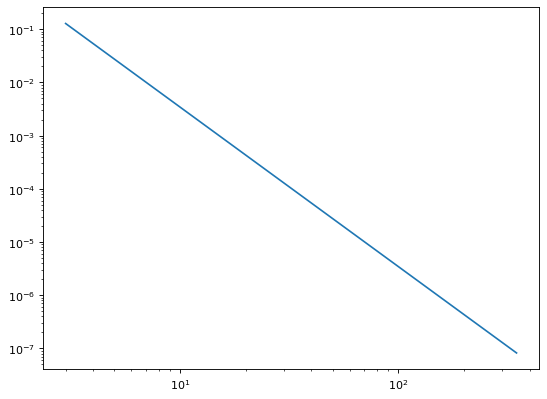

In [80]:
figure(figsize=(8, 6), dpi=80)
plt.plot(k_c,Distribution)
plt.yscale("log")
plt.xscale("log")
plt.show()

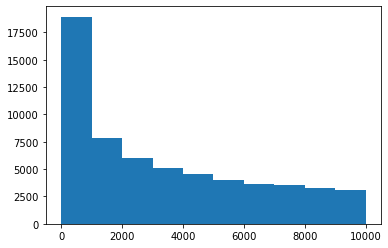

In [65]:
#plt.hist(L_log, bins=np.logspace(start=np.log10(0.1), stop=np.log10(100), num=50))
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([0.001,10])
plt.hist(K_t)
plt.show()


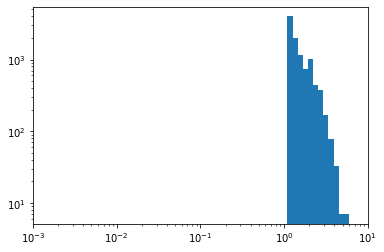

In [64]:
#plt.hist(L_log ,bins=10)
plt.hist(L_log, bins=np.logspace(start=np.log10(0.1), stop=np.log10(100), num=50))
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,10])
plt.show()